#  Import The Libraries

In [1]:
from bs4 import BeautifulSoup
import requests
import math
import pandas as pd
import patsy
from statistics import mean

import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,Ridge, Lasso, LassoCV ,RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import make_pipeline

import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
import warnings 
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import (cross_val_score, train_test_split, KFold, GridSearchCV)

# Collection data (Web Scraping by beautifulsoup)

Sources we Collection from are www.sa.aqar.fm and www.propertyfinder.sa

- The First source collection:

In [ ]:
villa_list_aqar=[]
Area_Of_villa=[]
i=1

while i<100:
    url = f"https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D9%84%D8%A8%D9%8A%D8%B9/{i}"
    res=requests.get(url)
    if res.status_code==200:
        p=res.text
        soup=BeautifulSoup(p,"lxml")
        i+=1
        
        houses=soup.find_all("div", {"class":"titleAndDetails"})
        headers = ["Price", "Num_Of_Bedrooms", "Num_Of_Bathrooms", "Size(m²)","District"]
        for house in houses:
            price = float(house.find(class_="price").text.replace("ريال", "").replace(",", "").strip())
            bed = int(house.find(class_="bed").text.strip())
            bath = int(house.find(class_="bath").text.strip())
            size = float(house.find(class_="size").text.replace("م²", "").strip())
            districts = house.find(class_="locText").text.strip()
            house_dict = dict(zip(headers, [price, bed, bath, size, districts]))
            villa_list_aqar.append(house_dict)
            
        URL= soup.find_all("a",class_="listTitle")
        for h in URL:
            pageurl="https://sa.aqar.fm"+h["href"]
            resp=requests.get(pageurl)
            hpage= resp.text
            hsoup=BeautifulSoup(hpage, "lxml")
            table=hsoup.find("table",class_="dc-detailsTable")
            
            
            for row in :
                if "الشارع" in row.text:
                    x=int(row.find_all("td")[0].text.replace("م", "").strip())
                    Area_Of_villa.append(x)
    else:
        break

In [ ]:
len(Area_Of_villa)

In [ ]:
len(villa_list_aqar)

In [ ]:
villa_aqar_DF=pd.DataFrame(villa_list_aqar)
villa_aqar_DF

In [ ]:
Area_villa_DF=pd.DataFrame(Area_Of_villa)
Area_villa_DF

In [ ]:
villa_aqar_DF["StreetWidth"]=Area_villa_DF
villa_aqar_DF

In [ ]:
# list villaDF in Riyadh city
villa_aqar_DF= villa_aqar_DF[villa_aqar_DF.District.str.contains("الرياض") == True]
villa_aqar_DF

In [ ]:
# All District without ("حي الرمال - الرياض")
villa_aqar_DF= villa_aqar_DF[villa_aqar_DF.District.str.contains("حي الرمال - الرياض") == False]
villa_aqar_DF

In [ ]:
houses_list_aqar = []
Area_Of_houses=[]

i = 1
while i < 200:
    url = f"https://sa.aqar.fm/%D8%A8%D9%8A%D8%AA-%D9%84%D9%84%D8%A8%D9%8A%D8%B9/%D8%A7%D9%84%D8%B1%D9%8A%D8%A7%D8%B6/{i}" 
    response = requests.get(url)
    if response.status_code == 200:
        page = response.text
        soup = BeautifulSoup(page, "lxml")
        i += 1
        houses=soup.find_all("div", {"class":"titleAndDetails"})
        headers = ["Price", "Num_Of_Bedrooms", "Num_Of_Bathrooms", "Size(m²)","District"]
        for house in houses:
            price = float(house.find(class_="price").text.replace("ريال", "").replace(",", "").strip())
            bed = int(house.find(class_="bed").text.strip())
            bath = int(house.find(class_="bath").text.strip())
            size = float(house.find(class_="size").text.replace("م²", "").strip())
            districts = house.find(class_="locText").text.strip()
            house_dict = dict(zip(headers, [price, bed, bath, size, districts]))
            houses_list_aqar.append(house_dict)
            
        URL= soup.find_all("a",class_="listTitle")
        for h in URL:
            pageurl="https://sa.aqar.fm"+h["href"]
            resp=requests.get(pageurl)
            hpage= resp.text
            hsoup=BeautifulSoup(hpage, "lxml")
            table=hsoup.find("table",class_="dc-detailsTable")
            rows=table.find_all("tr")
            
            for row in rows:
                if "الشارع" in row.text:
                    x=int(row.find_all("td")[0].text.replace("م", "").strip())
                    Area_Of_houses.append(x)
    else:
        break

In [ ]:
len(houses_list_aqar)

In [ ]:
len(Area_Of_houses)

In [ ]:
houses_aqar_DF = pd.DataFrame(houses_list_aqar)
houses_aqar_DF.head()

In [ ]:
Area_houses_DF=pd.DataFrame(Area_Of_houses)
Area_houses_DF

In [ ]:
houses_aqar_DF["StreetWidth"]=Area_houses_DF
houses_aqar_DF

- The Second source collection:

In [ ]:
houses_list_of_propertyfinder = []
i = 1
while i < 100:
    url_of_propertyfinder = f"https://www.propertyfinder.sa/ar/search?c=1&ob=mr&page=1&t=35" 
    response_of_propertyfinder = requests.get(url_of_propertyfinder)
    if response_of_propertyfinder.status_code == 200:
        page_of_propertyfinder = response_of_propertyfinder.text
        soup_of_propertyfinder = BeautifulSoup(page_of_propertyfinder, "lxml")
        i += 1
        houses_of_propertyfinder=soup_of_propertyfinder.find_all("div", {"class":"card-list__item"})#class name of div of each house
        headers_of_propertyfinder = ["Price", "Num_Of_Bedrooms", "Num_Of_Bathrooms", "Size(m²)","District"]
        
        for house in houses_of_propertyfinder:
            price = float(house.find(class_="card__price-value").text.replace("ريال", "").replace(",", "").strip())
            bed = int(house.find(class_="card__property-amenity card__property-amenity--bedrooms").text.replace("+", "").replace("عدد الغرف","").strip())
            bath = int(house.find(class_="card__property-amenity card__property-amenity--bathrooms").text.replace("+", "").replace("حمامات","").strip())
            size = float(house.find(class_="card__property-amenity card__property-amenity--area").text.replace("متر مربع", "").replace(",", "").strip())
            districts = house.find(class_="card__location-text").text.replace("حي الملقا","الملقا").strip()
            house_dict_of_propertyfinder = dict(zip(headers, [price, bed, bath, size, districts]))
            houses_list_of_propertyfinder.append(house_dict_of_propertyfinder)
    else:
        break

In [ ]:
len(houses_list_of_propertyfinder)

In [ ]:
houses_propertyfinder_DF = pd.DataFrame(houses_list_of_propertyfinder)

- Collect data from both sources into one DF (Sale_DF)

In [ ]:
Sale_DF = pd.concat([villa_aqar_DF, houses_aqar_DF, houses_propertyfinder_DF])
Sale_DF

# Save data in excel file

In [ ]:
Sale_DF.to_excel("aqar.xlsx")

In [3]:
Sale_DF= pd.read_excel ('aqar.xlsx')

# Data Preprocessing

In [4]:
Sale_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3363 entries, 0 to 3362
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        3363 non-null   int64 
 1   Unnamed: 0.1      3363 non-null   int64 
 2   Price             3363 non-null   int64 
 3   Num_Of_Bedrooms   3363 non-null   int64 
 4   Num_Of_Bathrooms  3363 non-null   int64 
 5   Size(m²)          3363 non-null   int64 
 6   District          3363 non-null   object
 7   StreetWidth       3363 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 210.3+ KB


In [5]:
Sale_DF.isnull().sum()

Unnamed: 0          0
Unnamed: 0.1        0
Price               0
Num_Of_Bedrooms     0
Num_Of_Bathrooms    0
Size(m²)            0
District            0
StreetWidth         0
dtype: int64

- drop null value

In [6]:
Sale_DF=Sale_DF.dropna()

In [7]:
Sale_DF.isnull().sum()

Unnamed: 0          0
Unnamed: 0.1        0
Price               0
Num_Of_Bedrooms     0
Num_Of_Bathrooms    0
Size(m²)            0
District            0
StreetWidth         0
dtype: int64

In [8]:
Sale_DF["StreetWidth"].isna().sum()

0

- drop zero value

In [9]:
Sale_DF.loc[~(Sale_DF==0).all(axis=1)]

Unnamed: 0  Unnamed: 0.1    Price  Num_Of_Bedrooms  Num_Of_Bathrooms  \
0              0             0  1400000                5                 5   
1              1             3  1400000                5                 5   
2              2             5  2500000                5                 5   
3              3             9  2700000                4                 5   
4              4            10  3000000                7                 5   
...          ...           ...      ...              ...               ...   
3358        3573          3800   300000                5                 5   
3359        3574          3801  2000000                5                 5   
3360        3575          3802  1850000                4                 4   
3361        3576          3804  1450000                5                 5   
3362        3577          3805   900000                5                 5   

      Size(m²)       District  StreetWidth  
0          510         الروضة           20  
1          375       المنصورة           15  
2          700         المنار           36  
3          375         النرجس           15  
4          600        اليرموك           20  
...        ...            ...          ...  
3358       185         سلطانة           20  
3359       450       ظهرة لبن           20  
3360       625         النظيم           20  
3361       750          الشفا           20  
3362       400  الدار البيضاء           15  

[3363 rows x 8 columns]

In [10]:
#check for zero value and saved in other DF
Sale_DF2 = Sale_DF.all()
Sale_DF2

Unnamed: 0          False
Unnamed: 0.1        False
Price                True
Num_Of_Bedrooms      True
Num_Of_Bathrooms     True
Size(m²)             True
District             True
StreetWidth          True
dtype: bool

In [11]:
Sale_DF.head()

Unnamed: 0  Unnamed: 0.1    Price  Num_Of_Bedrooms  Num_Of_Bathrooms  \
0           0             0  1400000                5                 5   
1           1             3  1400000                5                 5   
2           2             5  2500000                5                 5   
3           3             9  2700000                4                 5   
4           4            10  3000000                7                 5   

   Size(m²)  District  StreetWidth  
0       510    الروضة           20  
1       375  المنصورة           15  
2       700    المنار           36  
3       375    النرجس           15  
4       600   اليرموك           20

In [12]:
Sale_DF.sample(5)

Unnamed: 0  Unnamed: 0.1    Price  Num_Of_Bedrooms  Num_Of_Bathrooms  \
72            74           157  1250000                5                 5   
318          329           611  1000000                3                 4   
978         1017          1850  2800000                7                 4   
1222        1288           524   780000                5                 4   
1286        1359           697   250000                5                 5   

      Size(m²)       District  StreetWidth  
72         270           طويق           20  
318        375          الحزم           16  
978        672       الازدهار           15  
1222       455  الدار البيضاء           15  
1286       150          غبيرة            5

In [13]:
Sale_DF.tail()

Unnamed: 0  Unnamed: 0.1    Price  Num_Of_Bedrooms  Num_Of_Bathrooms  \
3358        3573          3800   300000                5                 5   
3359        3574          3801  2000000                5                 5   
3360        3575          3802  1850000                4                 4   
3361        3576          3804  1450000                5                 5   
3362        3577          3805   900000                5                 5   

      Size(m²)       District  StreetWidth  
3358       185         سلطانة           20  
3359       450       ظهرة لبن           20  
3360       625         النظيم           20  
3361       750          الشفا           20  
3362       400  الدار البيضاء           15

In [14]:
Sale_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3363 entries, 0 to 3362
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        3363 non-null   int64 
 1   Unnamed: 0.1      3363 non-null   int64 
 2   Price             3363 non-null   int64 
 3   Num_Of_Bedrooms   3363 non-null   int64 
 4   Num_Of_Bathrooms  3363 non-null   int64 
 5   Size(m²)          3363 non-null   int64 
 6   District          3363 non-null   object
 7   StreetWidth       3363 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 236.5+ KB


- "District" will be split to name of (الأحياء)

In [15]:
Sale_DF['District'] = Sale_DF['District'].str.split(" - ", n = 1, expand = True)
Sale_DF

Unnamed: 0  Unnamed: 0.1    Price  Num_Of_Bedrooms  Num_Of_Bathrooms  \
0              0             0  1400000                5                 5   
1              1             3  1400000                5                 5   
2              2             5  2500000                5                 5   
3              3             9  2700000                4                 5   
4              4            10  3000000                7                 5   
...          ...           ...      ...              ...               ...   
3358        3573          3800   300000                5                 5   
3359        3574          3801  2000000                5                 5   
3360        3575          3802  1850000                4                 4   
3361        3576          3804  1450000                5                 5   
3362        3577          3805   900000                5                 5   

      Size(m²)       District  StreetWidth  
0          510         الروضة           20  
1          375       المنصورة           15  
2          700         المنار           36  
3          375         النرجس           15  
4          600        اليرموك           20  
...        ...            ...          ...  
3358       185         سلطانة           20  
3359       450       ظهرة لبن           20  
3360       625         النظيم           20  
3361       750          الشفا           20  
3362       400  الدار البيضاء           15  

[3363 rows x 8 columns]

In [16]:
Sale_DF['District'] = Sale_DF['District'].str.split(", ", n = 1, expand = True)
Sale_DF

Unnamed: 0  Unnamed: 0.1    Price  Num_Of_Bedrooms  Num_Of_Bathrooms  \
0              0             0  1400000                5                 5   
1              1             3  1400000                5                 5   
2              2             5  2500000                5                 5   
3              3             9  2700000                4                 5   
4              4            10  3000000                7                 5   
...          ...           ...      ...              ...               ...   
3358        3573          3800   300000                5                 5   
3359        3574          3801  2000000                5                 5   
3360        3575          3802  1850000                4                 4   
3361        3576          3804  1450000                5                 5   
3362        3577          3805   900000                5                 5   

      Size(m²)       District  StreetWidth  
0          510         الروضة           20  
1          375       المنصورة           15  
2          700         المنار           36  
3          375         النرجس           15  
4          600        اليرموك           20  
...        ...            ...          ...  
3358       185         سلطانة           20  
3359       450       ظهرة لبن           20  
3360       625         النظيم           20  
3361       750          الشفا           20  
3362       400  الدار البيضاء           15  

[3363 rows x 8 columns]

In [17]:
Sale_DF['District'] = Sale_DF['District'].str.replace("حي ", "")
Sale_DF

Unnamed: 0  Unnamed: 0.1    Price  Num_Of_Bedrooms  Num_Of_Bathrooms  \
0              0             0  1400000                5                 5   
1              1             3  1400000                5                 5   
2              2             5  2500000                5                 5   
3              3             9  2700000                4                 5   
4              4            10  3000000                7                 5   
...          ...           ...      ...              ...               ...   
3358        3573          3800   300000                5                 5   
3359        3574          3801  2000000                5                 5   
3360        3575          3802  1850000                4                 4   
3361        3576          3804  1450000                5                 5   
3362        3577          3805   900000                5                 5   

      Size(m²)       District  StreetWidth  
0          510         الروضة           20  
1          375       المنصورة           15  
2          700         المنار           36  
3          375         النرجس           15  
4          600        اليرموك           20  
...        ...            ...          ...  
3358       185         سلطانة           20  
3359       450       ظهرة لبن           20  
3360       625         النظيم           20  
3361       750          الشفا           20  
3362       400  الدار البيضاء           15  

[3363 rows x 8 columns]

In [18]:
Sale_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3363 entries, 0 to 3362
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        3363 non-null   int64 
 1   Unnamed: 0.1      3363 non-null   int64 
 2   Price             3363 non-null   int64 
 3   Num_Of_Bedrooms   3363 non-null   int64 
 4   Num_Of_Bathrooms  3363 non-null   int64 
 5   Size(m²)          3363 non-null   int64 
 6   District          3363 non-null   object
 7   StreetWidth       3363 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 236.5+ KB


In [19]:
Sale_DF.shape

(3363, 8)

In [20]:
Sale_DF.sample(5)

Unnamed: 0  Unnamed: 0.1    Price  Num_Of_Bedrooms  Num_Of_Bathrooms  \
371          386           715  1250000                5                 5   
1713        1836          1931   500000                4                 2   
3253        3461          3683   250000                5                 2   
1219        1285           516   220000                5                 3   
460          478           874   850000                7                 5   

      Size(m²)       District  StreetWidth  
371        300           طويق           20  
1713       120        اليمامة           20  
3253       158        الشميسي           10  
1219       120         سلطانة           15  
460        200  النسيم الشرقي           21

- Convert type of (Num_Of_Bedrooms and Num_Of_Bathrooms) from float to int

In [21]:
Sale_DF['Num_Of_Bedrooms'] = Sale_DF['Num_Of_Bedrooms'].astype(float, errors = 'raise')
Sale_DF['Num_Of_Bathrooms'] = Sale_DF['Num_Of_Bathrooms'].astype(float, errors = 'raise')
Sale_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3363 entries, 0 to 3362
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3363 non-null   int64  
 1   Unnamed: 0.1      3363 non-null   int64  
 2   Price             3363 non-null   int64  
 3   Num_Of_Bedrooms   3363 non-null   float64
 4   Num_Of_Bathrooms  3363 non-null   float64
 5   Size(m²)          3363 non-null   int64  
 6   District          3363 non-null   object 
 7   StreetWidth       3363 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 236.5+ KB


- drop duplicate value

In [22]:
Sale_DF[Sale_DF.index.duplicated()]

Empty DataFrame
Columns: [Unnamed: 0, Unnamed: 0.1, Price, Num_Of_Bedrooms, Num_Of_Bathrooms, Size(m²), District, StreetWidth]
Index: []

In [23]:
Sale_DF.columns.duplicated().any()

False

In [24]:
Sale_DF= Sale_DF.loc[~Sale_DF.index.duplicated(), :]

In [25]:
Sale_DF.shape

(3363, 8)

In [26]:
Sale_DF.describe()

Unnamed: 0  Unnamed: 0.1         Price  Num_Of_Bedrooms  \
count  3363.000000   3363.000000  3.363000e+03      3363.000000   
mean   1787.340172   1915.683021  1.250782e+06         4.804044   
std    1039.769783   1097.805026  7.361113e+05         0.774724   
min       0.000000      0.000000  1.600000e+05         1.000000   
25%     873.500000    971.500000  7.800000e+05         5.000000   
50%    1801.000000   1917.000000  1.190000e+06         5.000000   
75%    2689.500000   2870.500000  1.700000e+06         5.000000   
max    3577.000000   3805.000000  4.400000e+06         7.000000   

       Num_Of_Bathrooms     Size(m²)  StreetWidth  
count       3363.000000  3363.000000  3363.000000  
mean           4.250966   376.595599    15.496878  
std            1.041692   185.257155     6.728629  
min            1.000000   106.000000     1.000000  
25%            4.000000   253.000000    10.000000  
50%            5.000000   362.000000    15.000000  
75%            5.000000   450.000000    20.000000  
max            5.000000  1040.000000   100.000000

# OUTLIERS

In [27]:
min_q, max_q = 0.01, 0.999
def feature_outlier_removal(data, feature, min_q, max_q):
    feature_min_outlier_mask = data[feature] > data[feature].quantile(min_q)
    feature_max_outlier_mask = data[feature] < data[feature].quantile(max_q)
    data = data[(feature_min_outlier_mask) & (feature_max_outlier_mask)]
    print(feature, "min: ", min(data[feature]))
    print(feature, "max: ", max(data[feature]))
    return data

In [28]:
Sale_DF = feature_outlier_removal(Sale_DF, "Price", 0.01, 0.99)

Price min:  180000
Price max:  3450000


In [29]:
Sale_DF = feature_outlier_removal(Sale_DF, "Size(m²)", 0.03, 0.999)

Size(m²) min:  125
Size(m²) max:  933


In [30]:
Sale_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3033 entries, 0 to 3362
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3033 non-null   int64  
 1   Unnamed: 0.1      3033 non-null   int64  
 2   Price             3033 non-null   int64  
 3   Num_Of_Bedrooms   3033 non-null   float64
 4   Num_Of_Bathrooms  3033 non-null   float64
 5   Size(m²)          3033 non-null   int64  
 6   District          3033 non-null   object 
 7   StreetWidth       3033 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 213.3+ KB


In [31]:
Sale_DF.describe()

Unnamed: 0  Unnamed: 0.1         Price  Num_Of_Bedrooms  \
count  3033.000000   3033.000000  3.033000e+03      3033.000000   
mean   1742.935048   1877.796571  1.292126e+06         4.841081   
std    1041.768273   1093.716424  6.516455e+05         0.782687   
min       0.000000      0.000000  1.800000e+05         1.000000   
25%     821.000000    942.000000  8.700000e+05         5.000000   
50%    1740.000000   1852.000000  1.250000e+06         5.000000   
75%    2649.000000   2828.000000  1.700000e+06         5.000000   
max    3577.000000   3805.000000  3.450000e+06         7.000000   

       Num_Of_Bathrooms     Size(m²)  StreetWidth  
count       3033.000000  3033.000000  3033.000000  
mean           4.377184   396.580613    15.562479  
std            0.956594   172.558600     6.619124  
min            1.000000   125.000000     1.000000  
25%            4.000000   280.000000    10.000000  
50%            5.000000   375.000000    15.000000  
75%            5.000000   450.000000    20.000000  
max            5.000000   933.000000   100.000000

In [38]:
Sale_DF.columns=Sale_DF.columns.str.strip()
Sale_DF.drop(columns=Sale_DF.columns[0], 
        axis=1, 
        inplace=True)
Sale_DF

Price  Num_Of_Bedrooms  Num_Of_Bathrooms  Size(m²)       District  \
0     1400000              5.0               5.0       510         الروضة   
1     1400000              5.0               5.0       375       المنصورة   
2     2500000              5.0               5.0       700         المنار   
3     2700000              4.0               5.0       375         النرجس   
4     3000000              7.0               5.0       600        اليرموك   
...       ...              ...               ...       ...            ...   
3358   300000              5.0               5.0       185         سلطانة   
3359  2000000              5.0               5.0       450       ظهرة لبن   
3360  1850000              4.0               4.0       625         النظيم   
3361  1450000              5.0               5.0       750          الشفا   
3362   900000              5.0               5.0       400  الدار البيضاء   

      StreetWidth  
0              20  
1              15  
2              36  
3              15  
4              20  
...           ...  
3358           20  
3359           20  
3360           20  
3361           20  
3362           15  

[3033 rows x 6 columns]

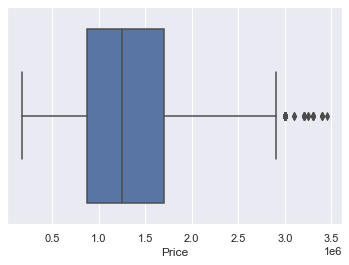

In [39]:
sns.boxplot(Sale_DF['Price']);

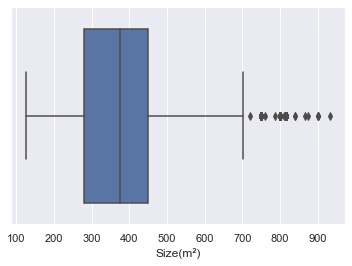

In [40]:
sns.boxplot(Sale_DF['Size(m²)']);

<AxesSubplot:xlabel='Price'>

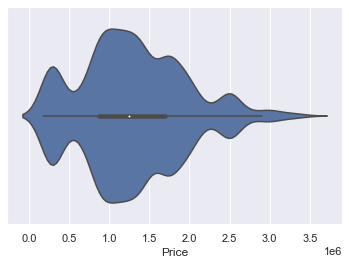

In [41]:
sns.violinplot(Sale_DF['Price'])

<AxesSubplot:xlabel='Size(m²)'>

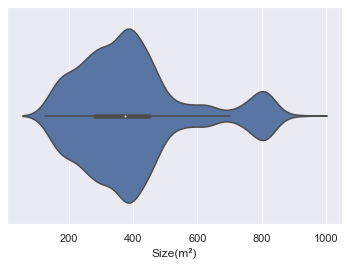

In [42]:
sns.violinplot(Sale_DF['Size(m²)'])

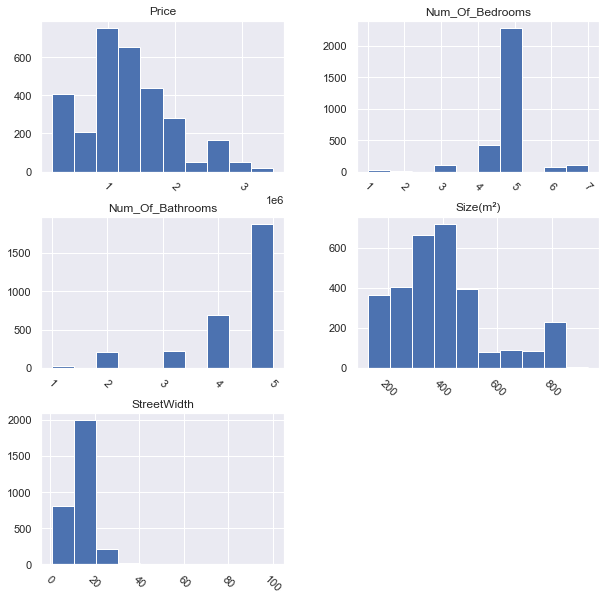

In [43]:
# Plot histogram grid
Sale_DF.hist(figsize=(10,10), xrot=-45);

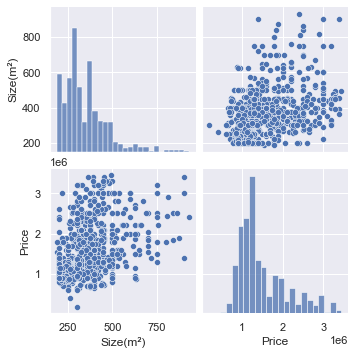

In [44]:
sns.pairplot(Sale_DF[['Size(m²)','Price']][:1000]);

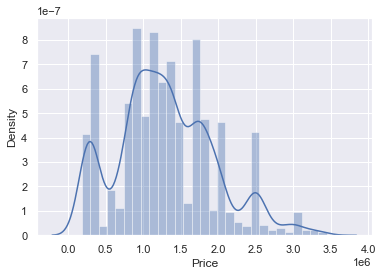

In [45]:
sns.distplot(Sale_DF['Price']);

In [46]:
# OUTLIERS
q2 = Sale_DF.Price.quantile(q=0.4)
q1 = Sale_DF.Price.quantile(q=0.1)
IQR = q2 -  q1
OUTLIER = q2 + 1.5 * IQR
OUTLIER

2300000.0

<AxesSubplot:xlabel='Price'>

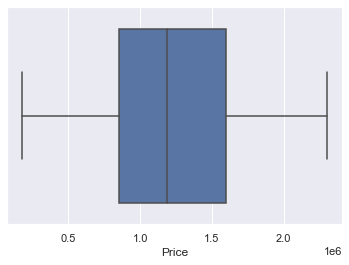

In [47]:
#PLOTTING THE BOX PLOT EXCLUDING THE OUTLIERS
sns.boxplot( Sale_DF[Sale_DF.Price<=OUTLIER].Price)

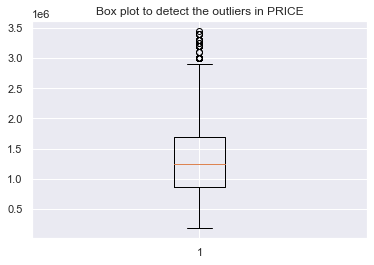

In [48]:
plt.boxplot(Sale_DF["Price"])
plt.title("Box plot to detect the outliers in PRICE")
plt.show()

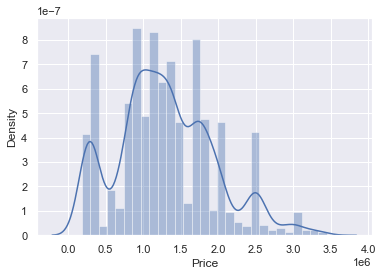

In [49]:
sns.distplot(Sale_DF['Price']);

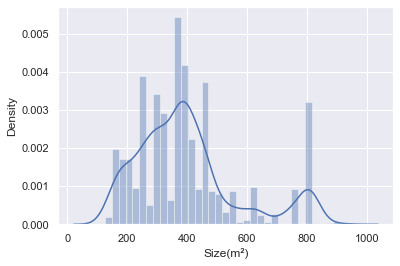

In [50]:
sns.distplot(Sale_DF['Size(m²)']);

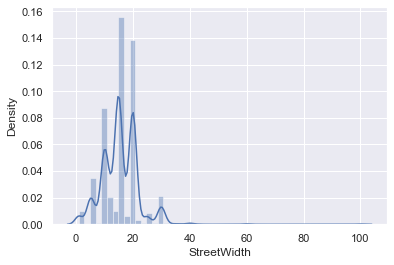

In [51]:
sns.distplot(Sale_DF['StreetWidth']);

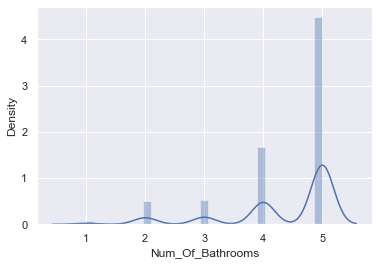

In [52]:
sns.distplot(Sale_DF['Num_Of_Bathrooms']);

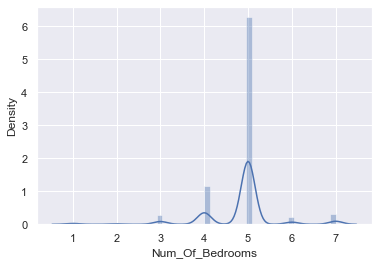

In [53]:
sns.distplot(Sale_DF['Num_Of_Bedrooms']);

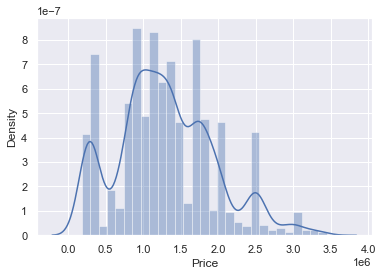

In [54]:
sns.distplot(Sale_DF['Price']);

In [55]:
# top 10
Sale_DF['District'].value_counts().head(10)

طويق              692
ظهرة لبن          263
الدار البيضاء     197
منفوحة الجديدة    172
النظيم            157
الخليج            123
الشميسي           115
بنبان             111
عكاظ              105
القادسية           95
Name: District, dtype: int64

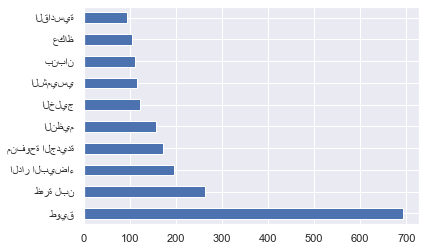

In [56]:
Sale_DF['District'].value_counts()[:10].plot(kind='barh');

In [57]:
Top_District =Sale_DF[['District' ,'Price']].groupby('District').mean().reset_index().sort_values(by = 'Price', ascending = False)
Top_District.head(10)

District         Price
70    الواحة  3.300000e+06
68     النفل  3.000000e+06
46     القدس  2.933333e+06
74  الياسمين  2.895464e+06
56    الملقا  2.685714e+06
97     قرطبة  2.650000e+06
63    النرجس  2.605278e+06
51    المروج  2.550000e+06
59    المنار  2.500000e+06
5    التعاون  2.408333e+06

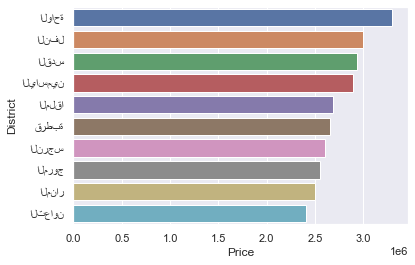

In [58]:
sns.barplot(data=Top_District.head(10), x='Price',y='District', palette = 'deep');

In [59]:
Sale_DF.describe()

Price  Num_Of_Bedrooms  Num_Of_Bathrooms     Size(m²)  \
count  3.033000e+03      3033.000000       3033.000000  3033.000000   
mean   1.292126e+06         4.841081          4.377184   396.580613   
std    6.516455e+05         0.782687          0.956594   172.558600   
min    1.800000e+05         1.000000          1.000000   125.000000   
25%    8.700000e+05         5.000000          4.000000   280.000000   
50%    1.250000e+06         5.000000          5.000000   375.000000   
75%    1.700000e+06         5.000000          5.000000   450.000000   
max    3.450000e+06         7.000000          5.000000   933.000000   

       StreetWidth  
count  3033.000000  
mean     15.562479  
std       6.619124  
min       1.000000  
25%      10.000000  
50%      15.000000  
75%      20.000000  
max     100.000000

# counting correlation

In [60]:
Sale_DF.corr()

Price  Num_Of_Bedrooms  Num_Of_Bathrooms  Size(m²)  \
Price             1.000000        -0.015048          0.330657  0.621290   
Num_Of_Bedrooms  -0.015048         1.000000          0.244396  0.059411   
Num_Of_Bathrooms  0.330657         0.244396          1.000000  0.207231   
Size(m²)          0.621290         0.059411          0.207231  1.000000   
StreetWidth       0.043085         0.021271          0.031697 -0.101476   

                  StreetWidth  
Price                0.043085  
Num_Of_Bedrooms      0.021271  
Num_Of_Bathrooms     0.031697  
Size(m²)            -0.101476  
StreetWidth          1.000000

In [61]:
Sale_DF.cov()

Price  Num_Of_Bedrooms  Num_Of_Bathrooms  \
Price             4.246419e+11     -7674.930638     206118.803694   
Num_Of_Bedrooms  -7.674931e+03         0.612599          0.182982   
Num_Of_Bathrooms  2.061188e+05         0.182982          0.915073   
Size(m²)          6.986223e+07         8.024029         34.207381   
StreetWidth       1.858405e+05         0.110196          0.200700   

                      Size(m²)    StreetWidth  
Price             6.986223e+07  185840.538555  
Num_Of_Bedrooms   8.024029e+00       0.110196  
Num_Of_Bathrooms  3.420738e+01       0.200700  
Size(m²)          2.977647e+04    -115.904197  
StreetWidth      -1.159042e+02      43.812800

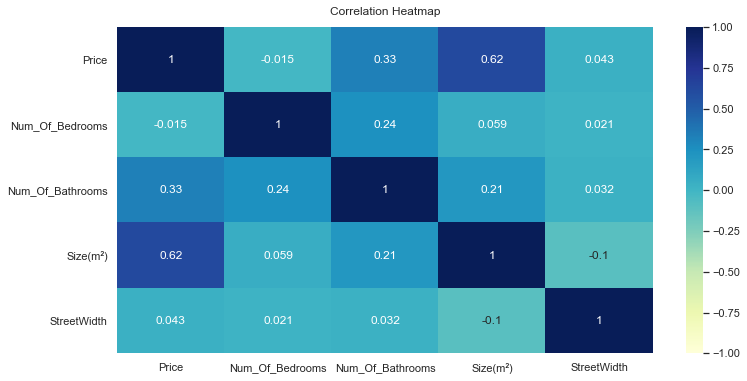

<Figure size 432x288 with 0 Axes>

In [62]:
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(Sale_DF.corr(), vmin=-1, vmax=1, annot=True,cmap="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()
plt.savefig('Correlation Heatmap.png')

- The "Size" feature has high positive correlation 0.67 with our target "Price"
- The "Num_Of_Bathrooms" feature has positive correlation 0.33 with our target "Price"
- The "Num_Of_Bedrooms" feature has low positive correlation 0.037 with our target "Price"

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


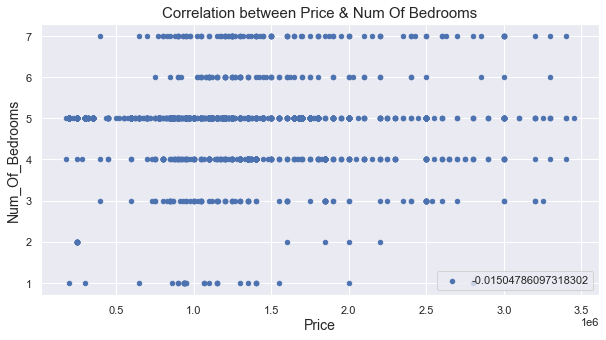

In [63]:
corr = Sale_DF["Price"].corr(Sale_DF['Num_Of_Bedrooms']) 
Sale_DF.plot(kind="scatter",y="Num_Of_Bedrooms" , x="Price",figsize=(10,5) , label = corr)
plt.title("Correlation between Price & Num Of Bedrooms" , fontsize=15)
plt.xlabel("Price" , fontsize=14)
plt.ylabel("Num_Of_Bedrooms" , fontsize=14)
plt.legend();

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


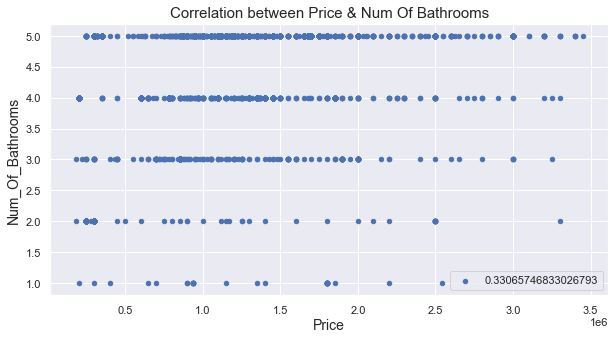

In [64]:
corr = Sale_DF["Price"].corr(Sale_DF['Num_Of_Bathrooms']) 
Sale_DF.plot(kind="scatter",y="Num_Of_Bathrooms" , x="Price",figsize=(10,5) , label = corr)
plt.title("Correlation between Price & Num Of Bathrooms" , fontsize=15)
plt.xlabel("Price" , fontsize=14)
plt.ylabel("Num_Of_Bathrooms" , fontsize=14)
plt.legend();

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


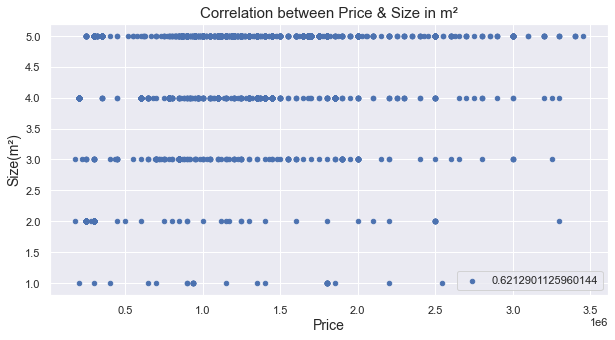

In [65]:
corr = Sale_DF["Price"].corr(Sale_DF['Size(m²)']) 
Sale_DF.plot(kind="scatter",y="Num_Of_Bathrooms" , x="Price",figsize=(10,5) , label = corr)
plt.title("Correlation between Price & Size in m²" , fontsize=15)
plt.xlabel("Price" , fontsize=14)
plt.ylabel("Size(m²)" , fontsize=14)
plt.legend();

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
No handles with labels found to put in legend.


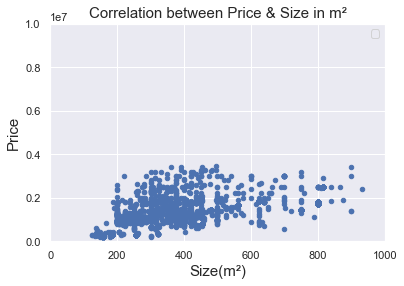

In [66]:
#Zoomed in plot for the price vs size(m2)

Sale_DF.plot(x="Size(m²)", y='Price', kind='scatter')
plt.xlim([0, 1000])
plt.ylim([0,1e7])
plt.title("Correlation between Price & Size in m²" , fontsize=15)
plt.xlabel("Size(m²)" , fontsize=15)
plt.ylabel("Price" , fontsize=15)
plt.legend();

In [67]:
Sale_DF.Price.describe()

count    3.033000e+03
mean     1.292126e+06
std      6.516455e+05
min      1.800000e+05
25%      8.700000e+05
50%      1.250000e+06
75%      1.700000e+06
max      3.450000e+06
Name: Price, dtype: float64

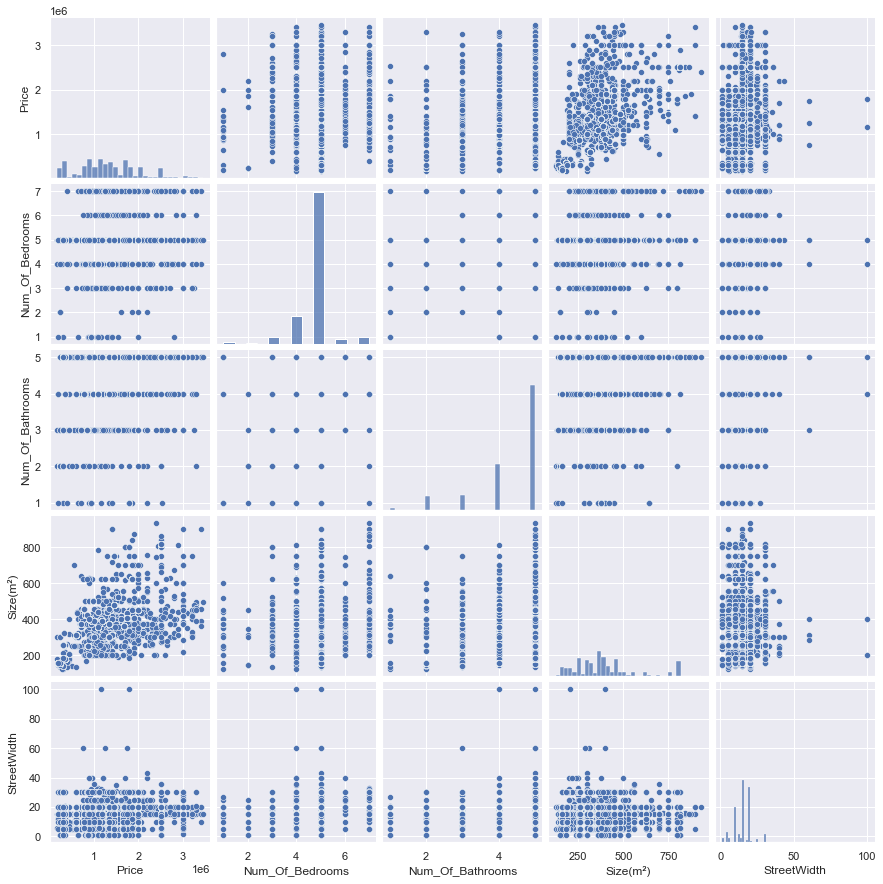

In [68]:
sns.pairplot(Sale_DF);

# Save data in excel file

In [69]:
Sale_DF.to_excel("aqar.xlsx")

In [70]:
Sale_DF= pd.read_excel ('aqar.xlsx')

# Model Building

# Setting up for modeling:

In [71]:
#Split the data 60 - 20 - 20 train/val/test
X_train, X_test, y_train, y_test = train_test_split(Sale_DF[['Size(m²)']], Sale_DF[['Price']], test_size=0.3, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [72]:
y_test.columns

Index(['Price'], dtype='object')

In [73]:
X_train.columns

Index(['Size(m²)'], dtype='object')

In [74]:
print("Training Data has",X_train.shape)
print("Testing Data has",X_test.shape)
print("Validation Data has",X_val.shape)

Training Data has (1486, 1)
Testing Data has (910, 1)
Validation Data has (637, 1)


# Modeling Housing Data with Statsmodels

In [75]:
# split into train and target
X= Sale_DF.iloc[:,1:]
y=Sale_DF['Price']

In [76]:
# fit model with target as housing price index
import statsmodels.api as sm

_model = sm.OLS(y_train, X_train, data=Sale_DF)

results =_model.fit()

# summarize our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.866
Model:                            OLS   Adj. R-squared (uncentered):              0.866
Method:                 Least Squares   F-statistic:                              9569.
Date:                Sun, 24 Oct 2021   Prob (F-statistic):                        0.00
Time:                        21:10:30   Log-Likelihood:                         -21687.
No. Observations:                1486   AIC:                                  4.338e+04
Df Residuals:                    1485   BIC:                                  4.338e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Size(m²)    3081.2867     31.499     97.820      0.000    3019.499    3143.075
==============================================================================
Omnibus:                      191.221   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.512
Skew:                           0.850   Prob(JB):                     5.63e-71
Kurtosis:                       4.529   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear regression model

In [77]:
lm = LinearRegression() # construct LinearRegression model object
lm.fit(X_train, y_train) #fit model to features X, target y

preds = lm.predict(X_test) # generate predictions for X using fit model
pred_1=lm.predict(X_val)  # score predictions on X against ground truth target y, using fit model

# score fit model on validation data
train_score = lm.score(X_train, y_train)
val_score = lm.score(X_val, y_val)
test_score = lm.score(X_test, y_test)

# report results
print('Linear Regression training R^2:', train_score)
print('Linear Regression validation R^2:', val_score)

Linear Regression training R^2: 0.38341462503659707
Linear Regression validation R^2: 0.4077923076505007


In [78]:
print('Linear Regression Testing R^2:', test_score)

Linear Regression Testing R^2: 0.3723069191665358


In [79]:
print(lm.intercept_)
print(lm.coef_)

[380673.60814491]
[[2278.72251171]]


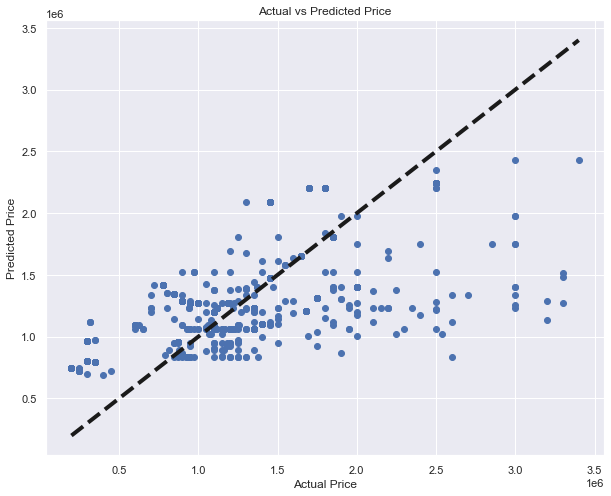

In [80]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(y_val,pred_1)
ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
ax.set_title('Actual vs Predicted Price')
ax.set_xlabel('Actual Price')
ax.set_ylabel('Predicted Price')
plt.show()

# Polynomial Regression

In [81]:
for i in range(2,7):
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(Sale_DF[['Price']])
    X_val_poly = poly.transform(Sale_DF[['Price']])

    lr_poly = LinearRegression()
    lr_poly.fit(X_train_poly,Sale_DF[['Price']])
    lr_poly.score(X_train_poly,Sale_DF[['Price']])
    
    print("_____________Degree ",i,"_______________")
    print("Polynomial (",i,") Regression training R^2 : ",lr_poly.score(X_train_poly,Sale_DF['Price']))
    print("Polynomial (",i,") Regression validation R^2 : ",lr_poly.score(X_val_poly, Sale_DF['Price']))

_____________Degree  2 _______________
Polynomial ( 2 ) Regression training R^2 :  1.0
Polynomial ( 2 ) Regression validation R^2 :  1.0
_____________Degree  3 _______________
Polynomial ( 3 ) Regression training R^2 :  0.9999998665989552
Polynomial ( 3 ) Regression validation R^2 :  0.9999998665989552
_____________Degree  4 _______________
Polynomial ( 4 ) Regression training R^2 :  0.9976328163738691
Polynomial ( 4 ) Regression validation R^2 :  0.9976328163738691
_____________Degree  5 _______________
Polynomial ( 5 ) Regression training R^2 :  0.9797576047317624
Polynomial ( 5 ) Regression validation R^2 :  0.9797576047317624
_____________Degree  6 _______________
Polynomial ( 6 ) Regression training R^2 :  0.9417079851784249
Polynomial ( 6 ) Regression validation R^2 :  0.9417079851784249


# dummy

In [82]:
Sale_DF_dummy = pd.get_dummies(Sale_DF, drop_first = True)

In [83]:
Sale_DF_dummy

Unnamed: 0    Price  Num_Of_Bedrooms  Num_Of_Bathrooms  Size(m²)  \
0              0  1400000                5                 5       510   
1              1  1400000                5                 5       375   
2              2  2500000                5                 5       700   
3              3  2700000                4                 5       375   
4              4  3000000                7                 5       600   
...          ...      ...              ...               ...       ...   
3028        3358   300000                5                 5       185   
3029        3359  2000000                5                 5       450   
3030        3360  1850000                4                 4       625   
3031        3361  1450000                5                 5       750   
3032        3362   900000                5                 5       400   

      StreetWidth  District_اشبيلية  District_الازدهار  District_الاندلس  \
0              20                 0                  0                 0   
1              15                 0                  0                 0   
2              36                 0                  0                 0   
3              15                 0                  0                 0   
4              20                 0                  0                 0   
...           ...               ...                ...               ...   
3028           20                 0                  0                 0   
3029           20                 0                  0                 0   
3030           20                 0                  0                 0   
3031           20                 0                  0                 0   
3032           15                 0                  0                 0   

      District_البديعة  ...  District_ظهرة نمار  District_عتيقة  \
0                    0  ...                   0               0   
1                    0  ...                   0               0   
2                    0  ...                   0               0   
3                    0  ...                   0               0   
4                    0  ...                   0               0   
...                ...  ...                 ...             ...   
3028                 0  ...                   0               0   
3029                 0  ...                   0               0   
3030                 0  ...                   0               0   
3031                 0  ...                   0               0   
3032                 0  ...                   0               0   

      District_عكاظ  District_عليشة  District_غبيرة  District_غرناطة  \
0                 0               0               0                0   
1                 0               0               0                0   
2                 0               0               0                0   
3                 0               0               0                0   
4                 0               0               0                0   
...             ...             ...             ...              ...   
3028              0               0               0                0   
3029              0               0               0                0   
3030              0               0               0                0   
3031              0               0               0                0   
3032              0               0               0                0   

      District_قرطبة  District_منفوحة  District_منفوحة الجديدة  District_نمار  
0                  0                0                        0              0  
1                  0                0                        0              0  
2                  0                0                        0              0  
3                  0                0                        0              0  
4                  0                0                        0              0  
...              ...              ...                 

After converting the categrical coulumns into dummy, we have ended up with 50 coulumns.

In [84]:
X = Sale_DF_dummy.drop(["Price"],axis=1)
y = Sale_DF_dummy["Price"]

m = sm.OLS(y,X, data = Sale_DF_dummy)
re = m.fit()
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              1132.
Date:                Sun, 24 Oct 2021   Prob (F-statistic):                        0.00
Time:                        21:10:31   Log-Likelihood:                         -41674.
No. Observations:                3033   AIC:                                  8.356e+04
Df Residuals:                    2928   BIC:                                  8.419e+04
Df Model:                         105                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Unnamed: 0                          -59.1217      5.794    -10.203      0.000     -70.483     -47.760
Num_Of_Bedrooms                    2.357e+04   6025.855      3.911      0.000    1.18e+04    3.54e+04
Num_Of_Bathrooms                   2.001e+04   5760.866      3.474      0.001    8714.680    3.13e+04
Size(m²)                           1702.7244     36.947     46.085      0.000    1630.279    1775.170
StreetWidth                         313.4026    650.010      0.482      0.630    -961.120    1587.925
District_اشبيلية                   1.096e+06   7.88e+04     13.909      0.000    9.42e+05    1.25e+06
District_الازدهار                  1.114e+06   1.37e+05      8.139      0.000    8.46e+05    1.38e+06
District_الاندلس                   1.186e+06   1.18e+05     10.018      0.000    9.54e+05    1.42e+06
District_البديعة                  -1.581e+04   1.06e+05     -0.149      0.881   -2.23e+05    1.92e+05
District_التعاون                   1.472e+06   1.37e+05     10.781      0.000     1.2e+06    1.74e+06
District_الجرادية                 -1.459e+04   7.06e+04     -0.207      0.836   -1.53e+05    1.24e+05
District_الجزيرة                    2.33e+05   1.64e+05      1.419      0.156    -8.9e+04    5.55e+05
District_الجنادرية                 6.136e+05   9.28e+04      6.615      0.000    4.32e+05    7.95e+05
District_الحائر                   -1.029e+05   7.78e+04     -1.322      0.186   -2.56e+05    4.97e+04
District_الحزم                     4.068e+05   4.67e+04      8.714      0.000    3.15e+05    4.98e+05
District_الحمراء                   1.045e+06   1.65e+05      6.335      0.000    7.22e+05    1.37e+06
District_الخالدية                  1.164e+05   1.37e+05      0.850      0.395   -1.52e+05    3.85e+05
District_الخليج                    1.011e+06   4.35e+04     23.227      0.000    9.25e+05     1.1e+06
District_الدار البيضاء             7.684e+04   3.61e+04      2.126      0.034    5985.638    1.48e+05
District_الدريهمية                  7.44e+04   1.65e+05      0.451      0.652   -2.49e+05    3.98e+05
District_الربوة                    9.509e+05   2.32e+05      4.094      0.000    4.95e+05    1.41e+06
District_الربيع                    1.108e+06   2.31e+05      4.807      0.000    6.56e+05    1.56e+06
District_الرمال                    6.806e+05   4.22e+04     16.130      0.000    5.98e+05    7.63e+05
District_الروضة                     7.64e+05   1.09e+05      7.031      0.000    5.51e+05    9.77e+05
District_الرياض                    3.596e+05   6.85e+04      5.253      0.000    2.25e+05    4.94e+05
District_الريان                    8.704e+05   2.32e+05      3.744      0.000    4.15e+05    1.33e+06
District_الزهرة           

# Regression after dummy
Splitting the data into 3 parts: 60% training, 20% validation , 20% testing.

In [85]:
X = Sale_DF_dummy.drop(["Price"],axis=1)
y = Sale_DF_dummy["Price"]

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=40)

In [86]:
X_train.head()

Unnamed: 0  Num_Of_Bedrooms  Num_Of_Bathrooms  Size(m²)  StreetWidth  \
1391        1478                5                 4       159           20   
2269        2478                4                 4       625           20   
306          318                3                 4       375           16   
2348        2565                5                 3       422            5   
2691        2961                5                 5       816            6   

      District_اشبيلية  District_الازدهار  District_الاندلس  District_البديعة  \
1391                 0                  0                 0                 0   
2269                 0                  0                 0                 0   
306                  0                  0                 0                 0   
2348                 0                  0                 0                 0   
2691                 0                  0                 0                 0   

      District_التعاون  ...  District_ظهرة نمار  District_عتيقة  \
1391                 0  ...                   0               0   
2269                 0  ...                   0               0   
306                  0  ...                   0               0   
2348                 0  ...                   0               0   
2691                 0  ...                   0               0   

      District_عكاظ  District_عليشة  District_غبيرة  District_غرناطة  \
1391              0               0               0                0   
2269              0               0               0                0   
306               0               0               0                0   
2348              0               0               0                0   
2691              0               0               0                0   

      District_قرطبة  District_منفوحة  District_منفوحة الجديدة  District_نمار  
1391               0                0                        0              0  
2269               0                0                        0              0  
306                0                0                        0              0  
2348               0                0                        0              0  
2691               0                0                        0              0  

[5 rows x 105 columns]

In [87]:
lm = LinearRegression()

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)


poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

poly3 = PolynomialFeatures(degree=3) 
X_train_poly3 = poly3.fit_transform(X_train.values)
X_val_poly3 = poly3.transform(X_val.values)
X_test_poly3 = poly3.transform(X_test.values)

lm_poly = LinearRegression()


lm_reg = Ridge(alpha=1)

lm_lasso = Lasso(alpha = 100)

In [88]:
print("====Linear Regression====")
lm.fit(X_train, y_train)
print(f'Linear Regression training R^2: {lm.score(X_train,y_train):.3f}')
print(f'Linear Regression validation R^2: {lm.score(X_val, y_val):.3f}')

print("====Ridge Regression====")
lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression training R^2: {lm_reg.score(X_train_scaled, y_train):.3f}')
print(f'Ridge Regression validation R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

print("====Lasso Regression====")
lm_lasso.fit(X_train_scaled, y_train)
print(f'Lasso Regression training R^2: {lm_lasso.score(X_train_scaled, y_train):.3f}')
print(f'Lasso Regression validation R^2: {lm_lasso.score(X_val_scaled, y_val):.3f}')

====Linear Regression====
Linear Regression training R^2: 0.886
Linear Regression validation R^2: 0.863
====Ridge Regression====
Ridge Regression training R^2: 0.886
Ridge Regression validation R^2: 0.863
====Lasso Regression====
Lasso Regression training R^2: 0.886
Lasso Regression validation R^2: 0.863


In [89]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 71)
linearC = cross_val_score(lm,X,y,cv= kf, scoring= "r2")
print("Cross validation for Linear Regression :",np.mean(linearC))

Cross validation for Linear Regression : 0.850056809414647


In [90]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 71)
ridgeC = cross_val_score(lm_reg,X,y,cv= kf, scoring= "r2")
print("Cross validation for Ridge:",np.mean(ridgeC))

Cross validation for Ridge: 0.8506169640706334


In [91]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 71)
lassoC = cross_val_score(lm_lasso,X,y,cv= kf, scoring= "r2")
print("Cross validation for Linear Regression :",np.mean(lassoC))

Cross validation for Linear Regression : 0.8536030399997797


# Test

In [92]:
print("====Linear Regression====")
lm.fit(X, y)
print(f'Linear Regression training & validation R^2: {lm.score(X,y):.3f}')
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

print("====Ridge Regression (best alpha)====")
lm_reg.fit(X, y)
print(f'Ridge Regression training & validation R^2: {lm_reg.score(X, y):.3f}')
print(f'Ridge Regression test R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')

print("====Lasso Regression (best alpha)====")
lm_lasso.fit(X, y)
print(f'Lasso Regression training & validation R^2: {lm_lasso.score(X, y):.3f}')
print(f'Lasso Regression test R^2: {lm_lasso.score(X_test_scaled, y_test):.3f}')

====Linear Regression====
Linear Regression training & validation R^2: 0.885
Linear Regression test R^2: 0.811
====Ridge Regression (best alpha)====
Ridge Regression training & validation R^2: 0.876
Ridge Regression test R^2: -46.053
====Lasso Regression (best alpha)====
Lasso Regression training & validation R^2: 0.882
Lasso Regression test R^2: -63.168


===============================================================================================================================

# lasso_model

In [93]:
def lasso_model(X_train,y_train,X_val,y_val, regular_var = 1,
                CV_flag = False, cv_value = 5, alphavec = [0.1,0.01, 0.001]):
    
    if CV_flag is True:
        m = LassoCV(alphas = alphavec, cv = cv_value)
        m.fit(X_train, y_train)
        print("mean error:", m.mse_path_)
    else:
        m = Lasso(alpha = regular_var) 
        m.fit(X_train, y_train )

        print("Training score :", round(m.score(X_train,y_train) ,5))
        print("Val score :", round(m.score(X_val,y_val),5))
    return m
lasso_model(X_train ,y_train ,X_val ,y_val ,regular_var = 100)

Training score : 0.88376
Val score : 0.85747


Lasso(alpha=100)